In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
import yfinance as yf
print(yf.__version__)

0.2.54


In [3]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [7]:
start = '2012-01-01'
end = '2025-04-07'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [8]:
data.reset_index(inplace=True)

In [9]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.495001,16.562924,16.171749,16.185880,147611217
1,2012-01-04,16.566147,16.614982,16.376262,16.485582,114989399
2,2012-01-05,16.336349,16.459304,16.267435,16.413692,131808205
3,2012-01-06,16.113497,16.360893,16.107794,16.339821,108119746
4,2012-01-09,15.430305,16.038633,15.399813,16.026237,233776981
...,...,...,...,...,...,...
3329,2025-03-31,156.229996,157.130005,152.210007,154.809998,33591600
3330,2025-04-01,158.880005,160.080002,155.255005,155.300003,20111400
3331,2025-04-02,158.860001,160.274994,156.529999,156.960007,17113300


In [10]:
ma_100_days = data.Close.rolling(100).mean()

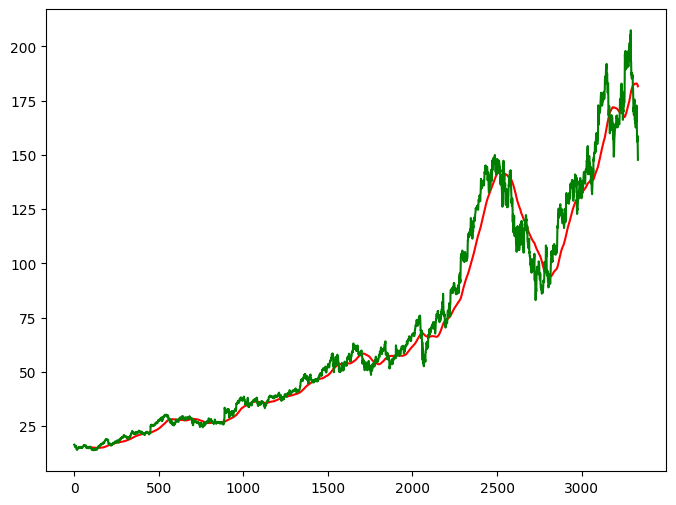

In [11]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [12]:
ma_200_days = data.Close.rolling(200).mean()

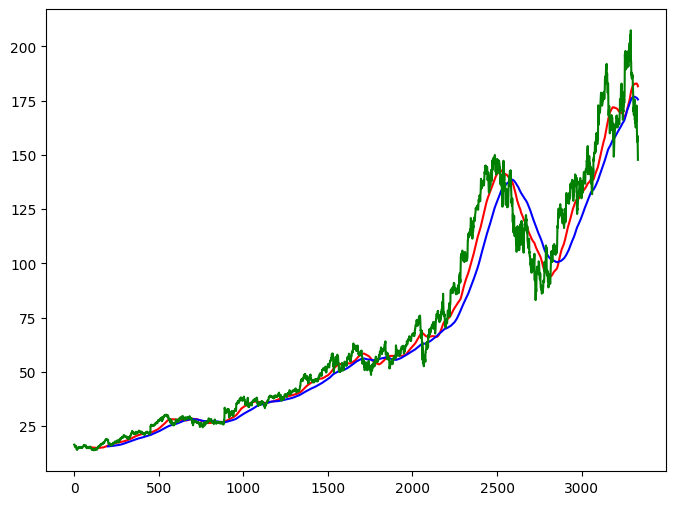

In [13]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [14]:
data.dropna(inplace=True)

In [15]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [16]:
data_train.shape[0]

2667

In [17]:
data_test.shape[0]

667

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
data_train_scale = scaler.fit_transform(data_train)

In [20]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [21]:
x, y = np.array(x), np.array(y)

In [22]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential




In [23]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\satva\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [25]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 28s 212ms/step - loss: 0.0584
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 15s 184ms/step - loss: 0.0062
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 22s 196ms/step - loss: 0.0048
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 20s 183ms/step - loss: 0.0047
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 15s 184ms/step - loss: 0.0048
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 15s 182ms/step - loss: 0.0037
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 15s 189ms/step - loss: 0.0047
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 15s 185ms/step - loss: 0.0041
Epoch 9/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 15s 190ms/step - loss: 0.0032
Epoch 10/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 23s 218ms/step - loss: 0.0033
Epoch 11/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 14s 176ms/step - loss: 0.0030
Epoch 12/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 21s 180ms/step - loss: 0.0030
Epoch 13/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 18s 214ms/step - loss: 0.0032
Epoch 14/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 16s 199ms/step - loss: 0.0030
Epoch 15/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 16s 

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [27]:
pas_100_days = data_train.tail(100)

In [28]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [29]:
data_test_scale  =  scaler.fit_transform(data_test)

In [30]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [31]:
y_predict = model.predict(x)

21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step


In [32]:
scale =1/scaler.scale_

In [33]:
y_predict = y_predict*scale

In [34]:
y = y*scale

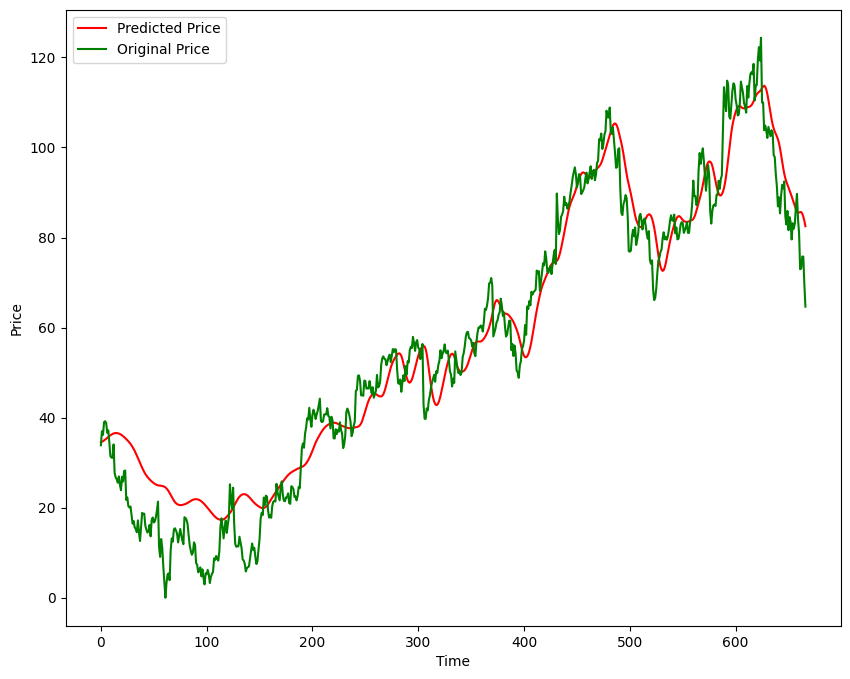

In [35]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [36]:
model.save('Stock Predictions Model.keras')